**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/your-first-map).**

---


# "Exercise: Your First Map"
> "kaggle test"

- toc: true
- branch: master
- badges: true
- comments: true
- author: YeEun
- categories: [jupyter, python]

# Introduction

[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, run the code cell below to set up our feedback system.

In [1]:
import geopandas as gpd

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

# 데이터 로드

In [6]:
loans_filepath = "C:/Users/82108/Desktop/data mining/archive/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Check your answer
#q_1.check()

# Uncomment to view the first five rows of the data
#world_loans.head()

world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [7]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

# world, world_loans 데이터로 지도 시각화

<AxesSubplot:>

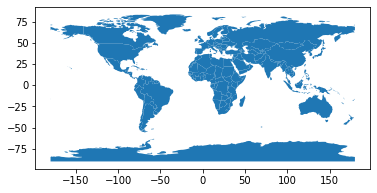

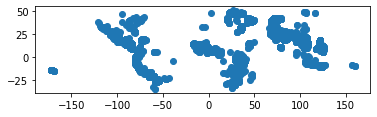

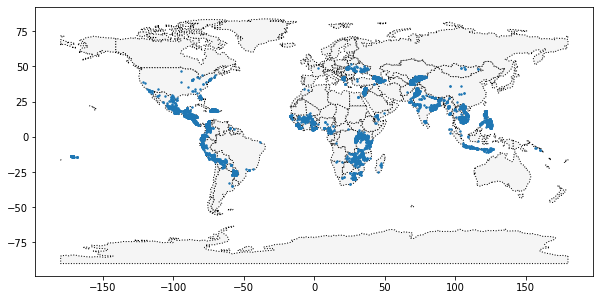

In [8]:
# Your code here
world.plot()
world_loans.plot()

ax = world.plot(figsize=(10,10), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)
# Uncomment to see a hint
#q_2.hint()

In [12]:
# Get credit for your work after you have created a map
#q_2.check()

# Uncomment to see our solution (your code may look different!)
#q_2.solution()

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

# 필리핀에 기반을 둔 loan 데이터셋 생성

In [10]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()
PHL_loans.head()
# Check your answer
#q_3.check()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


In [15]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

# PHL, PHL_loans 을 사용해 시각화

In [12]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("archive/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

<AxesSubplot:>

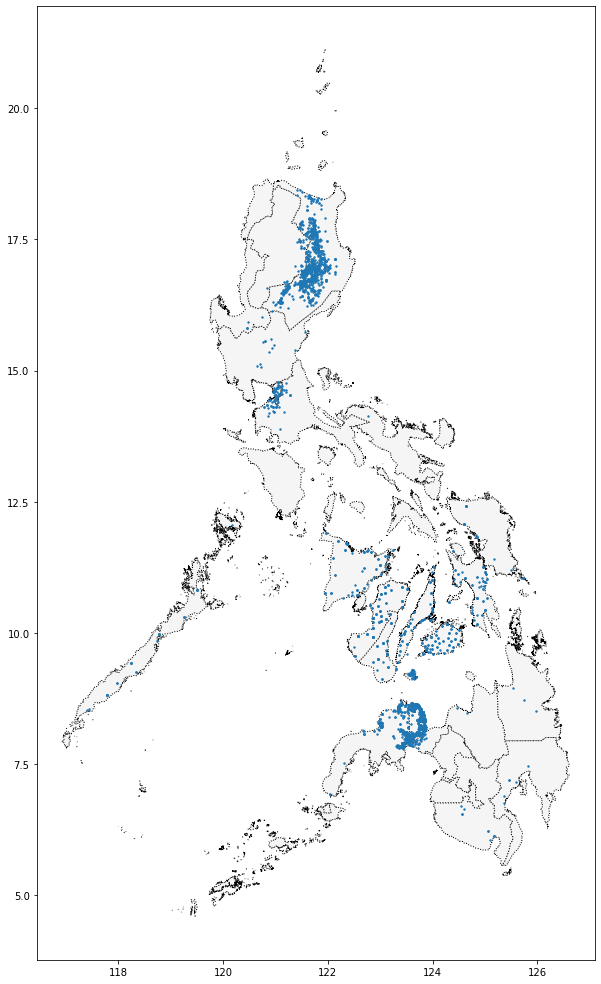

In [13]:
# Your code here
ax = PHL.plot(figsize=(10,20), color='whitesmoke', linestyle=':', edgecolor='black')
PHL_loans.plot(ax=ax, markersize=2)
# Uncomment to see a hint
#q_4.a.hint()

In [24]:
# Get credit for your work after you have created a map
#q_4.a.check()

# Uncomment to see our solution (your code may look different!)
#q_4.a.solution()

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

You might find [this map](https://bit.ly/2U2G7x7) useful to answer the question.

In [37]:
# View the solution (Run this code cell to receive credit!)
#q_4.b.solution()

# Keep going

Continue to learn about **[coordinate reference systems](https://www.kaggle.com/alexisbcook/coordinate-reference-systems)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/geospatial-analysis/discussion) to chat with other learners.*